In [622]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화|면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumGothic')
plt.rc('axes', unicode_minus=False)

## 1. 데이터 확인 및 전처리

In [623]:
df = pd.read_csv('/home/piai/바탕화면/빅분_백은정/빅데이터분석/SCALE불량.csv', encoding = 'euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [625]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [626]:
# plate 번호는 ID이기 때문에 분석에 필요없기에 drop한다.
df.drop("plate_no", axis = 1, inplace = True)

# scale 범주형 -> 수치형
df['scale'] = df['scale'].map({'양품': 0, '불량':1})

df

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,03JAN2023:07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,03JAN2023:07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,03JAN2023:07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,03JAN2023:07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,03JAN2023:07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [627]:
# 시간변수를 datetime형식으로 변환

df['rolling_date'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df_sorted = df.sort_values(by = 'rolling_date', ascending = True)

In [628]:
df['rolling_date'].value_counts().sort_index()

2023-01-03 07:07:53    1
2023-01-03 07:21:22    1
2023-01-03 07:31:15    1
2023-01-03 07:41:01    1
2023-01-03 07:52:40    1
                      ..
2023-01-10 05:32:25    1
2023-01-10 05:39:19    1
2023-01-10 05:52:41    1
2023-01-10 06:01:50    1
2023-01-10 06:16:27    1
Name: rolling_date, Length: 1000, dtype: int64

In [629]:
# 날짜별로 이틀씩 묶기
# 1월 3~4:1, 1월 5~6:2, 1월 7~8:3, 1월 9~10:4

# 2일 간격으로 날짜 구간을 생성
bins = pd.date_range(start='2023-01-03', end='2023-01-11', freq='2D')

# 숫자 라벨 생성 (1, 2, 3, ...)
bin_labels = range(1, len(bins))

# 'rolling_date'를 이용하여 각 날짜를 구간에 할당하고 숫자 라벨을 사용
df['date_n'] = pd.cut(df['rolling_date'], bins=bins, labels=bin_labels, right=False)

df

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
0,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,1
1,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,1
2,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,1
3,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,1
4,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-10 05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,4
996,2023-01-10 05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,4
997,2023-01-10 05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,4
998,2023-01-10 06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,4


In [630]:
# 수치형 데이터만 골라보기
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric

,rolling_date,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,date_n
0,2023-01-03 07:07:53,0,32,3700,15100,1144,116,1133,59,259,1133,934,8,1
1,2023-01-03 07:21:22,0,32,3700,15100,1144,122,1135,53,238,1135,937,8,1
2,2023-01-03 07:31:15,0,33,3600,19200,1129,116,1121,55,258,1121,889,8,1
3,2023-01-03 07:41:01,0,33,3600,19200,1152,125,1127,68,266,1127,885,8,1
4,2023-01-03 07:52:40,0,38,3100,13300,1140,134,1128,48,246,1128,873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-10 05:32:25,0,19,3400,41500,1142,55,1151,86,203,1151,948,10,4
996,2023-01-10 05:39:19,0,19,3400,41500,1142,55,1151,86,209,1151,948,10,4
997,2023-01-10 05:52:41,0,17,3400,43700,1169,65,1163,77,227,1163,948,10,4
998,2023-01-10 06:01:50,0,17,3400,43700,1169,65,1163,77,204,1163,948,10,4


In [631]:
# 표면적(가로*세로) 파생변수 생성
#'pt_width'와 'pt_length'를 곱하여 'area'라는 새로운 열을 생성
# pt_area = pt_width * pt_length

df['pt_area'] = df['pt_width'] * df['pt_length']

In [632]:
df.head(0)
# pt_area 변수 생성된 거 확인

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n,pt_area


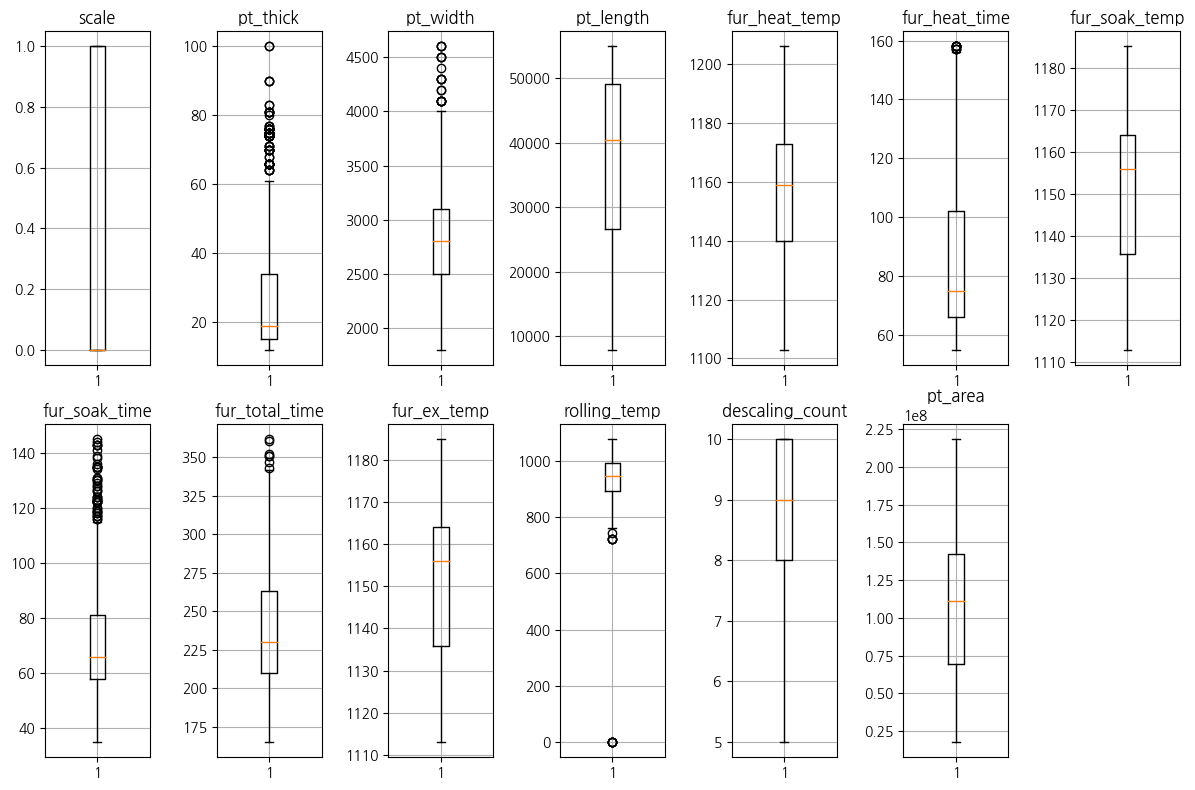

In [633]:
# 이상치를 보기위한 박스플롯 그래프

# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

* 압연온도 0도 -> 이상치라고 판단함
* 따라서 rolling_temp가 0인 경우는 제외하기로 결정함.

In [634]:
df[df['rolling_temp']<100]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n,pt_area
53,2023-01-03 16:22:29,0,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,...,1128,80,244,1128,TMCP(온도제어),0,6,1조,1,43320000
221,2023-01-04 19:44:09,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1166,67,228,1166,CR(제어압연),0,10,2조,1,95920000
222,2023-01-04 19:56:39,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1164,61,188,1164,CR(제어압연),0,10,2조,1,95920000
598,2023-01-07 11:40:51,0,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1122,59,229,1122,CR(제어압연),0,6,3조,3,27090000
599,2023-01-07 11:52:00,0,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1124,61,210,1124,CR(제어압연),0,6,3조,3,27720000
600,2023-01-07 11:59:10,0,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1117,76,260,1117,TMCP(온도제어),0,6,3조,3,59000000


<Axes: >

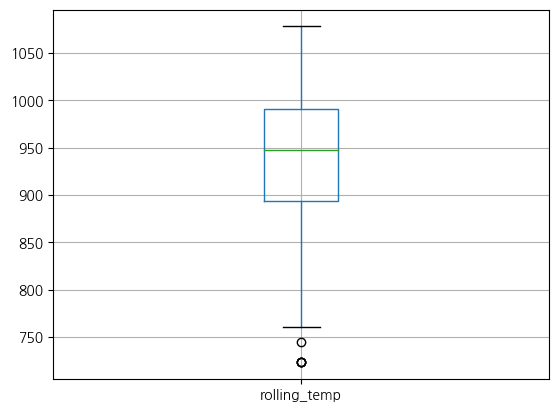

In [635]:
# 압연온도 0도 -> 이상치 제거함
df = df.drop(df[df['rolling_temp']<100].index, axis=0).reset_index()

# 이상치제거확인
df.boxplot('rolling_temp')

In [636]:
df[df['fur_total_time']>350]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n,pt_area
556,559,2023-01-07 04:43:54,0,PILAC-BT33,한국,T,50,2500,10900,적용,...,1123,98,351,1123,CR(제어압연),888,6,2조,3,27250000
562,565,2023-01-07 05:51:14,0,PILAC-BT33,한국,T,50,1800,22200,적용,...,1122,96,351,1122,CR(제어압연),901,6,2조,3,39960000
656,662,2023-01-07 21:59:05,0,NV-A,영국,C,12,3400,52100,적용,...,1137,105,352,1137,CR(제어압연),887,10,4조,3,177140000
693,699,2023-01-08 04:00:06,0,GL-A,독일,C,15,3100,51800,적용,...,1148,107,361,1148,CR(제어압연),942,10,4조,3,160580000
695,701,2023-01-08 04:22:24,0,LR-A,영국,C,15,3100,51800,적용,...,1148,99,362,1148,CR(제어압연),942,10,4조,3,160580000


fur_total_time(가열로 총 재로시간) 350분 이상이 이상치라고 나왔지만, 실제 공정에서 350분 이상이 잘못된 재로시간인지는 알아봐야함

pt_thick(후판 지시두께 = 목표두께), pt_width(후판 지시폭)은 고객사에서 원하는 지시두께와 지시폭이 어떠한지 모르므로 이상치라고 판단하기 어려울 것 같음

## 2. 탐색적분석

In [637]:
# 연속형변수 간 상관도 확인
df.corr().round(3).drop('index').drop(columns=['index'])

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,pt_area
scale,1.000,-0.094,-0.194,0.049,0.221,-0.036,0.327,-0.221,-0.129,0.327,0.511,-0.043,-0.050
pt_thick,-0.094,1.000,-0.321,-0.867,-0.522,0.206,-0.663,0.364,0.344,-0.663,-0.451,-0.845,-0.845
pt_width,-0.194,-0.321,1.000,0.149,0.201,-0.104,0.218,-0.101,-0.138,0.218,-0.155,0.354,0.492
pt_length,0.049,-0.867,0.149,1.000,0.467,-0.136,0.600,-0.336,-0.278,0.600,0.366,0.817,0.924
fur_heat_temp,0.221,-0.522,0.201,0.467,1.000,-0.162,0.785,-0.375,-0.315,0.785,0.341,0.484,0.466
fur_heat_time,-0.036,0.206,-0.104,-0.136,-0.162,1.000,-0.347,0.114,0.736,-0.347,-0.132,-0.164,-0.138
fur_soak_temp,0.327,-0.663,0.218,0.600,0.785,-0.347,1.000,-0.601,-0.564,1.000,0.629,0.623,0.573
fur_soak_time,-0.221,0.364,-0.101,-0.336,-0.375,0.114,-0.601,1.000,0.633,-0.601,-0.487,-0.402,-0.304
fur_total_time,-0.129,0.344,-0.138,-0.278,-0.315,0.736,-0.564,0.633,1.000,-0.564,-0.345,-0.341,-0.266
fur_ex_temp,0.327,-0.663,0.218,0.600,0.785,-0.347,1.000,-0.601,-0.564,1.000,0.629,0.623,0.573


* 가열로 균열대 온도(fur_soak_temp)와 가열로 추출온도(fur_ex_temp)의 상관계수가 1이기때문에 가열로 추출온도(fur_ex_temp)를 지워도 될 것 같다고 판단함.

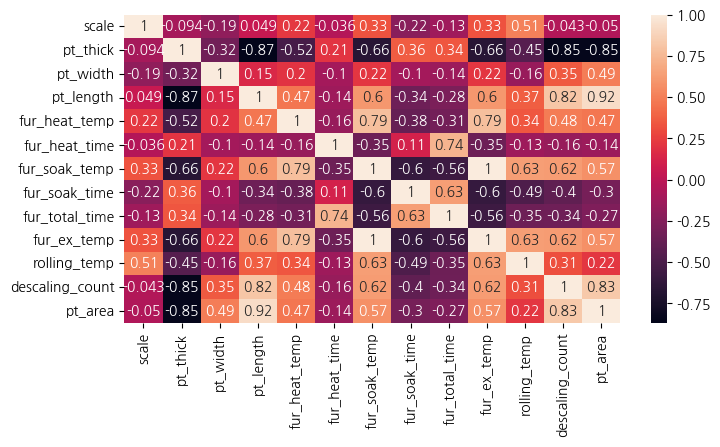

In [638]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr().drop('index').drop(columns=['index']),annot= True)
plt.show()

* fur_soak_temp와 fur_ex_temp의 상관계수가 1인 것을 보아 가열로 균열대 소재온도와 가열로 추출온도가 같은 변수라고 생각 할 수 있다.

In [639]:
df = df.drop('fur_ex_temp', axis = 1)

Text(0, 0.5, '빈도')

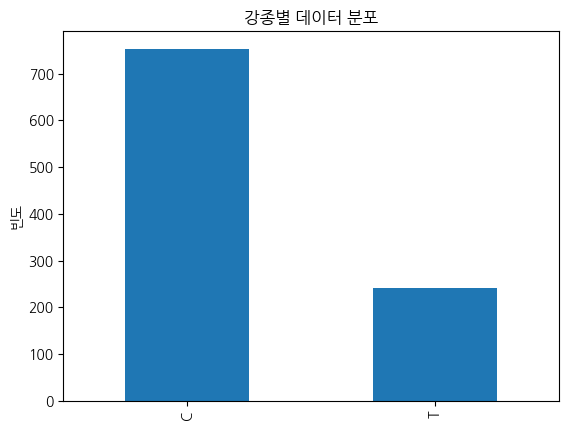

In [640]:
# 강종 별 데이터 수 확인
df_s = df["steel_kind"].value_counts()
df_s.sort_index(inplace = True)

# 그래프 제목과 축 라벨 설정
df_s.plot.bar()
plt.title('강종별 데이터 분포')
plt.ylabel('빈도')

In [641]:
df['steel_kind'].value_counts()

C    753
T    241
Name: steel_kind, dtype: int64

In [642]:
# 탄소강만 추출
df[df["steel_kind"]=="C"].reset_index(drop=True).drop(columns=['index'])

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,date_n,pt_area
0,2023-01-04 03:00:41,0,BV-B,프랑스,C,20,3600,39300,적용,3호기,...,76,1126,118,297,CR(제어압연),934,8,2조,1,141480000
1,2023-01-04 03:14:24,0,BV-B,프랑스,C,20,3600,39500,적용,3호기,...,68,1132,104,235,CR(제어압연),911,8,2조,1,142200000
2,2023-01-04 03:19:27,0,AB/B,미국,C,17,3400,39600,적용,2호기,...,71,1130,112,240,CR(제어압연),935,10,2조,1,134640000
3,2023-01-04 03:28:12,0,LR-B,영국,C,17,3400,39600,적용,2호기,...,71,1130,112,287,CR(제어압연),935,10,2조,1,134640000
4,2023-01-04 03:42:56,0,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,...,80,1131,117,286,CR(제어압연),915,10,2조,1,168960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-01-10 05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,55,1151,86,203,CR(제어압연),948,10,4조,4,141100000
749,2023-01-10 05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,55,1151,86,209,CR(제어압연),948,10,4조,4,141100000
750,2023-01-10 05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,65,1163,77,227,CR(제어압연),948,10,4조,4,148580000
751,2023-01-10 06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,65,1163,77,204,CR(제어압연),948,10,4조,4,148580000


<function matplotlib.pyplot.show(close=None, block=None)>

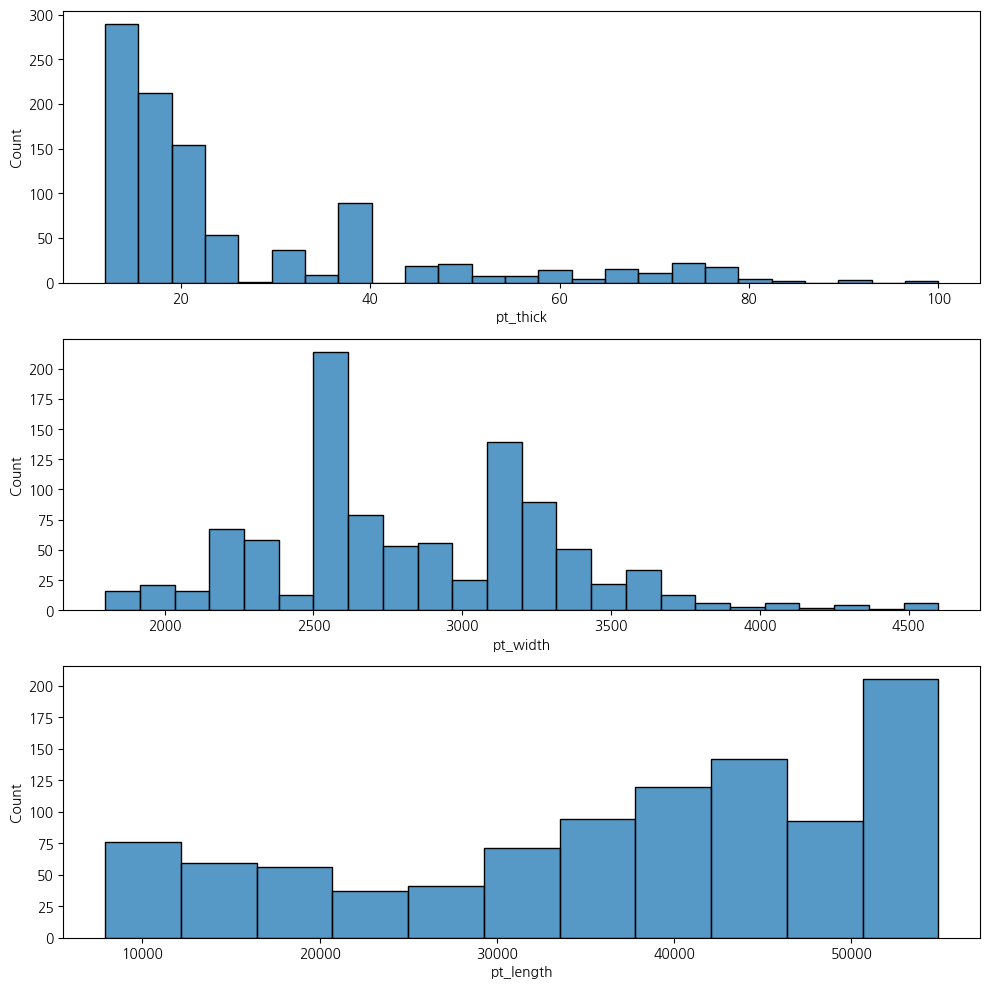

In [643]:
# 후판 지시두께, 지시폭, 지시길이 별 데이터 수 확인
# 밑에 양품/불량품 나눠서 데이터 수도 있으므로 필요없을거같긴함...

fig, axes = plt.subplots(3, 1, figsize=(10,10))

sns.histplot(df, x='pt_thick', ax=axes[0])
sns.histplot(df, x='pt_width', ax=axes[1])
sns.histplot(df, x='pt_length', ax=axes[2])

plt.tight_layout()
plt.show

ValueError: Could not interpret value `fur_ex_temp` for parameter `x`

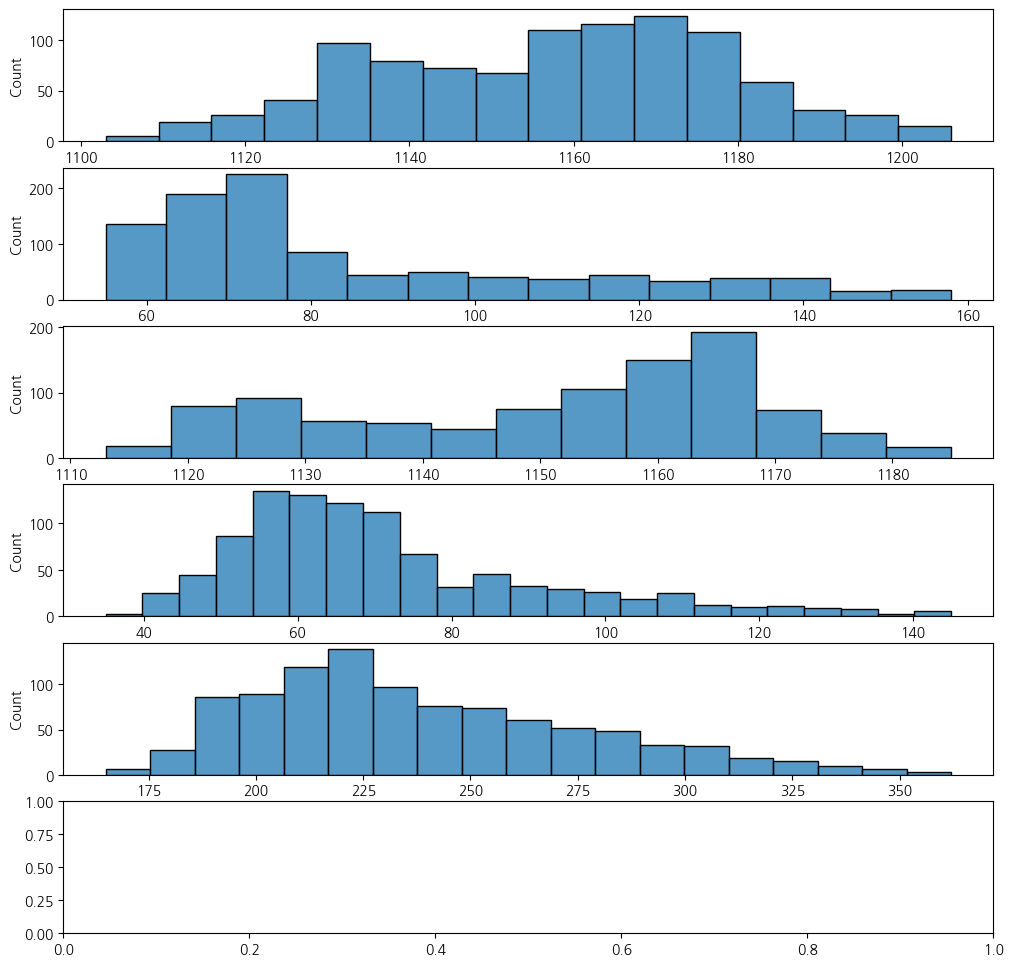

In [644]:
# 가열로 가열대 소재온도/재로시간, 가열로 균열대 소재온도/재로시간, 가열로 총 재로시간, 가열로 추출온도 별 데이터수
# 이것도 밑에 양품/불량품 나눠서 그래프 그린거 있음... 아마 필요없을듯

fig, axes = plt.subplots(6, 1, figsize=(12, 12))

sns.histplot(df, x="fur_heat_temp", ax=axes[0])
sns.histplot(df, x="fur_heat_time", ax=axes[1])
sns.histplot(df, x="fur_soak_temp", ax=axes[2])
sns.histplot(df, x="fur_soak_time", ax=axes[3])
sns.histplot(df, x="fur_total_time", ax=axes[4])
sns.histplot(df, x="fur_ex_temp", ax=axes[5])

plt.tight_layout()
plt.show()

In [ ]:
# 압연온도와 압연횟수, 압연방법 별 데이터 수

fig, axes = plt.subplots(3, 1, figsize=(8, 8))

sns.histplot(df, x="rolling_temp", ax=axes[0])
sns.histplot(df, x="descaling_count", ax=axes[1])
sns.histplot(df, x="rolling_method", ax=axes[2])


plt.tight_layout()
plt.show()

In [ ]:
# hsb별 데이터 수 확인
df_h = df["hsb"].value_counts()
df_h.sort_index(inplace = True)

# 그래프 제목과 축 라벨 설정
plt.title('hsb별 데이터 분포')
plt.ylabel('빈도')
df_h.plot.bar()

In [ ]:
# 국가별 데이터 수
print(df["spec_country"].value_counts())

sns.countplot(x="spec_country", data=df, order=df["spec_country"].value_counts().index)
plt.show()

In [ ]:
# 가열로 호기 별 데이터 수
df.groupby("fur_no").count().drop(columns=['index'])

In [ ]:
# 작업조 별 데이터 수
print(df["work_group"].value_counts())
sns.countplot(x="work_group", data=df, order=df["work_group"].value_counts().index)
plt.show()

In [ ]:
df_numeric_x = df_numeric.drop("scale", axis = 1)
df_numeric_y = df_numeric["scale"]
df_numeric_x

In [ ]:
# 양품과 불량품의 각각의 데이터 수 확인

# 연속형 변수와 Scale의 상관관계를 보기위한 히스토그램 작성

i = 0
n_cols = 3 # 열의 수 설정
n_rows = 4

fig = plt.figure(figsize = (15,20))
columns = [col for col in df_numeric_x.columns if col not in ['rolling_date']]
for col in columns:
    plt.subplot(n_rows, n_cols, i+1)
    i += 1
    plt.hist(df[df["scale"] == 0][col], label = "양품", alpha = 0.5, color = 'skyblue')
    plt.hist(df[df["scale"] == 1][col], label = "불량", alpha = 0.5, color = 'pink')
    plt.xlabel(col)
    plt.ylabel("scale")
    plt.legend()
plt.show()

- 후판 지시두께(pt_thick) 작을 수록, 가열로 가열대/균열대/총 재로시간이 짧을 수록 불량이 높았다.
- (온도 - 압연온도(rolling_temp)는 높을 수록 불량이 높았지만, 가열대 소재온도(fur_heat_temp), 균열대 소재온도(fur_soak_temp), 가열로 추출온도(fur_ex_temp)는 확인필요)

In [645]:
def crosstab_visual(df, variables, target):
    for var in variables:
        crosstab = pd.crosstab(df[var], df[target])
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f"Cross-tabulation for {var} and {target}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.legend(title=target)
        plt.show()

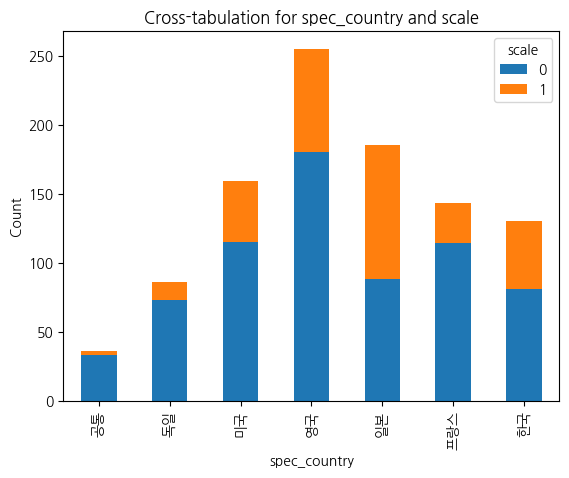

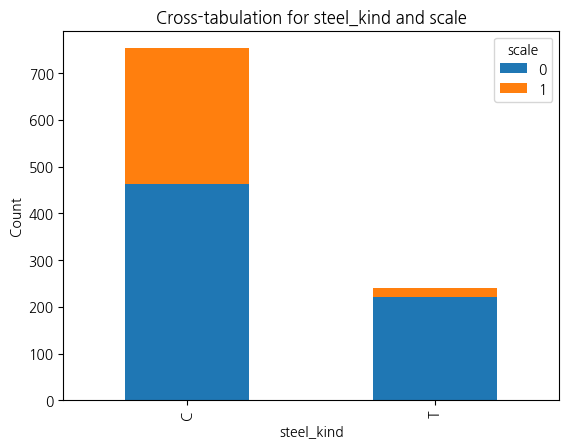

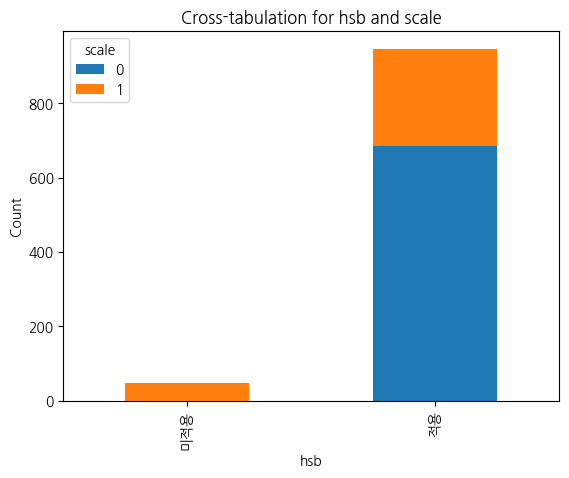

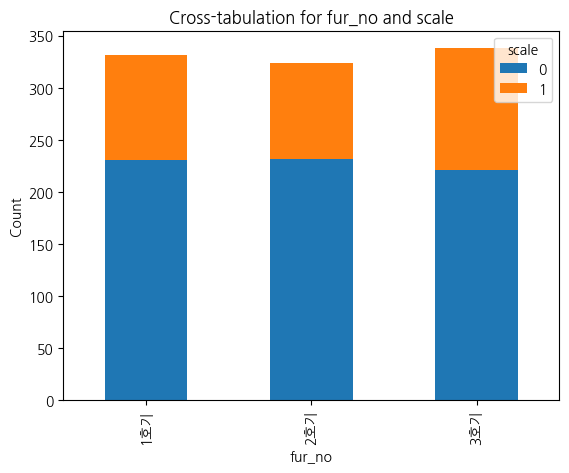

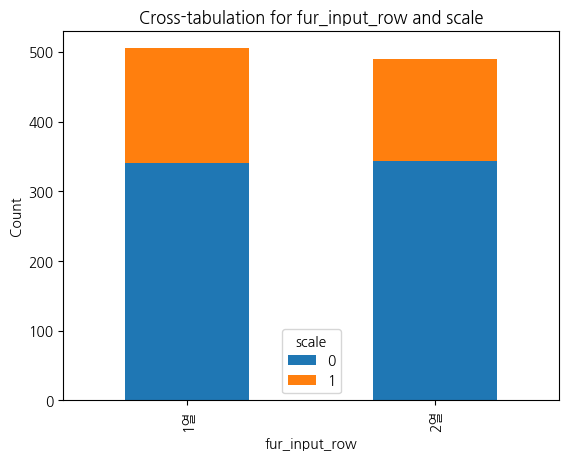

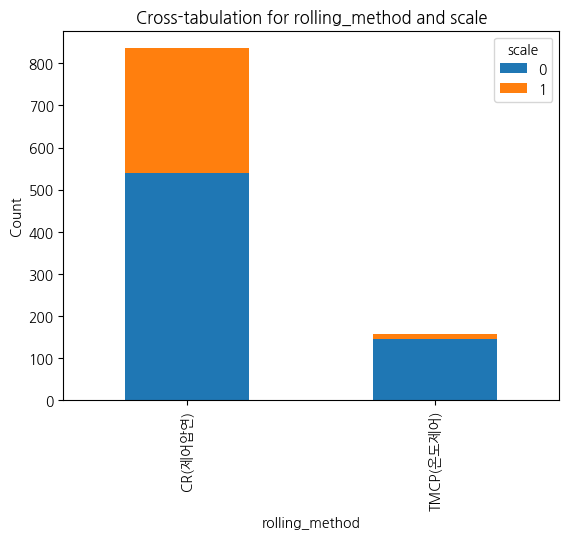

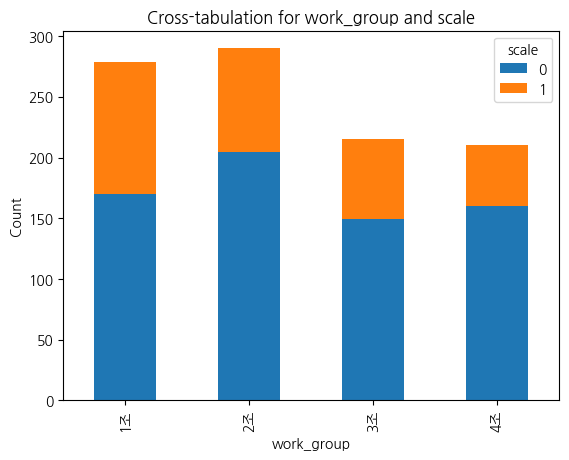

In [646]:
# 범주형변수 간 상관도 확인
variables = ['spec_country','steel_kind', 'hsb', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group']

# 목표변수
target = 'scale'

# 함수 호출
crosstab_visual(df, variables, target)

In [647]:
df_groups = df.groupby(["hsb"])["scale"]
df_w = pd.DataFrame(columns = ["hsb", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"hsb" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,hsb,scale_prob
0,미적용,1.000000
1,적용,0.277719


* hsb를 미적용 하면 무조건 scale 발생한다. -> hsb는 무조건 적용해야 한다
* 위에 그래프에서도 확인가능

## 3. 가설검정

In [648]:
# 도메인 지식: 길이 길고 두꺼우면 재로시간이 길기때문에 산화가 많이 생겨 불량이 생길 확률이 커진다

**[가설검정 1]**

* 총 재로시간이 불량에 유의미한 영향을 미치는지를 알아보는 검정.
* 1) 불량인 경우 총 재로시간 변수와 양품인 경우 총 재로시간 변수 생성
* 2) 불량과 양품을 판단하는데 총 재로시간이 유의미한 영향을 미치는가의 가설검정을 2-sample t-test로 시행한다.(범주형변수 2개-불량품, 양품 / 수치형변수-총 재로시간)

* H0: 총 재로시간은 불량에 유의미한 영향을 미치지않는다.
* H1: 총 재로시간은 불량에 유의미한 영향을 미친다.

In [649]:
from scipy import stats
total_time_y = df['fur_total_time'][df['scale'] == 0]  # 양품인 경우 총 재로시간 리스트
total_time_b = df['fur_total_time'][df['scale'] == 1] # 불량인 경우 총 재로시간 리스트
                                    
# 정규성검정
statistic, p = stats.shapiro(total_time_y)
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.9609451293945312, p-value = 1.6123940290574401e-12


유의확률 p값이 유의수준 0.05보다 작으므로 양품인 경우의 총 재로시간 데이터들이 정규성을 만족하지않는다는 것을 알 수있다.

In [650]:
# 등분산성검정
stats.bartlett(total_time_y, total_time_b)

BartlettResult(statistic=28.86757290193691, pvalue=7.749956661099707e-08)

유의확률 p값이 유의수준 0.05보다 작기때문에 등분산성도 만족하지않는다는 것을 알 수있다.

In [651]:
t_result = stats.ttest_ind(total_time_y, total_time_b)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:4.108
p:0.0


정규성과 등분산성 모두 만족하지 않기때문에 만위트니 u 검정을 시행하여 가설을 기각할 지 채택할 지 판단한다.

In [652]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(total_time_y, total_time_b, alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 119810.5
p-value: 0.0010056293050324332


유의확률 p값이 유의수준 0.05보다 작기때문에 귀무가설을 기각한다는 것을 알 수있다.
따라서 총 재로시간은 불량에 유의미한 영향을 미친다고 할 수있다.
또한 t검정통계량이 4.108로 양수이기 때문에 양품인 경우에 총 재로시간이 더 길다는 것을 알 수있다.
그러나 도메인지식에서 총 재로시간이 길수록 산화가 많이 발생하기 때문에 불량일 확률이 높다. 따라서 양품인 경우에 총 재로시간이 길다는 검정결과가 나왔지만, 실제적으로 불량과 양품을 판단하는 것에 총 재로시간이 많은 영향을 줄 것이라고는 보기 힘들것 같다고 판단된다.

**[가설검정 2]**

* 겉넓이에 따른 총 재로시간의 차이를 알아보는 검정.
* 1) 겉넓이 변수 area 생성
* 2) area의 평균을 기준으로 평균 이상인 값은 above, 평균 이하인 값은 below로 나눔
* 3) 변수 above, below에 따른 총 재로시간의 평균의 차이를 보는 가설검정을 2-sample t-test로 시행한다.

* H0: 겉넓이에 따라 총 재로시간의 평균에 차이가 없다.
* H1: 겉넓이에 따라 총 재로시간의 평균에 차이가 있다.

In [659]:
df['area'] = (df['pt_thick'] * df['pt_width'])*2 + (df['pt_thick'] * df['pt_length'])*2 +(df['pt_length'] * df['pt_width'])*2

In [660]:
area_mean = df['area'].mean().round(3)
area_mean

212638908.853

In [661]:
df['area_n']=np.where(df['area'] > 212638908.853, 'above', 'below')
print(df[['area', 'area_n']].head())

        area area_n
0  112943200  below
1  112943200  below
2  139744800  below
3  139744800  below
4   83706400  below


In [662]:
a = df[df['area_n']=='above']
b = df[df['area_n']=='below']

In [663]:
a['fur_total_time']

116    297
117    235
118    240
119    287
120    286
      ... 
989    203
990    209
991    227
992    204
993    208
Name: fur_total_time, Length: 537, dtype: int64

In [664]:
b['fur_total_time']

0      259
1      238
2      258
3      266
4      246
      ... 
900    217
901    202
902    218
907    189
908    192
Name: fur_total_time, Length: 457, dtype: int64

In [665]:
from scipy import stats
# 정규성검정
statistic, p = stats.shapiro(a['fur_total_time'])
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.9172304272651672, p-value = 1.4498644429306138e-16


유의확률 p값이 유의수준 0.05보다 작으므로 a그룹이 정규성을 만족하지않는다는 것을 알 수있다.

In [666]:
# 등분산성검정
stats.bartlett(a['fur_total_time'], b['fur_total_time'])

BartlettResult(statistic=1.4105947607878027, pvalue=0.23495768466816003)

유의확률 p값이 유의수준 0.05보다 크기때문에 등분산성을 만족한다는 것을 알 수있다.

In [668]:
t_result = stats.ttest_ind(a['fur_total_time'], b['fur_total_time'])

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-6.3
p:0.0


정규성을 만족하지않고 등분산성을 만족하기때문에 만위트니 u 검정을 시행하여 가설을 기각할 지 채택할 지 판단한다.

In [669]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(a['fur_total_time'], b['fur_total_time'], alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 89650.5
p-value: 2.339579875478231e-13


유의확률 p값이 유의수준 0.05보다 작기때문에 귀무가설을 기각한다는 것을 알 수있다.
따라서 겉넓이에 따라 총 재로시간의 평균에 차이가 있다고 할 수 있다.
또한 검정통계량이 -6.3로 음수이기 때문에 below에 속하는, 즉 겉넓이가 좁은 집단의 총 재로시간의 평균값이 더 크다는 것을 알 수있다.
그러나 겉넓이를 가지고 길이와 두께를 판단할 수없기 때문에 겉넓이가 좁은 집단에서 총 재로시간이 길다는 검정결과가 나왔지만, 실제적으로 불량과 양품을 판단하는 것에 총 재로시간이 많은 영향을 줄 것이라고는 보기 힘들것 같다고 판단된다.

**[가설검정 3]**

* 위의 가설에서 겉넓이에 따라 총 재로시간의 평균에 차이가 있다는 것을 알았기 때문에 여기서 확장하여 양품과 불량품을 판단하는데 겉넓이가 유의미한 영향을 미치는지를 알아보는 검정을 시행한다.

* 1) 양품인 경우의 겉넓이와 불량인 경우의 겉넓이의 변수 생의
* 2) 불량과 양품을 판단하는데 표면적이 유의미한 영향을 미치는가의 가설검정을 2-sample t-test로 시행한다.(범주형변수 2개-불량품, 양품 / 수치형변수-겉넓이)

* H0: 슬라브의 겉넓이는 불량에 유의미한 영향을 미치지않는다.
* H1: 슬라브의 겉넓이는 불량에 유의미한 영향을 미친다.

descaling의 종류인 hsb를 적용하지 않았을 경우 무조건 불량이 발생하므로, hsb를 적용했을 경우만 추출하여 검정하기로 판단함.

In [670]:
new_df = df[df['hsb'] == "적용"]
new_df['area'] = df['area']

In [671]:
new_df['area'].isnull().sum()

0

In [672]:
from scipy import stats
area_y = new_df['area'][new_df['scale'] == 0]
area_b = new_df['area'][new_df['scale'] == 1]

# 정규성검정
statistic, p = stats.shapiro(area_y)
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.9194528460502625, p-value = 1.2528427926891404e-18


유의확률 p값이 유의수준 0.05보다 작으므로 양품인 경우의 겉넓이 데이터는 정규성을 만족하지않는다는 것을 알 수있다.

In [673]:
# 등분산성검정
stats.bartlett(area_y, area_b)

BartlettResult(statistic=81.39652080070616, pvalue=1.846827841324443e-19)

유의확률 p값이 유의수준 0.05보다 작기때문에 등분산성을 만족하지않는 것을 알 수있다.

In [674]:
t_result = stats.ttest_ind(area_y, area_b)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:2.152
p:0.032


정규성을 만족하지않고 등분산성도 만족하지않기때문에 만위트니 u 검정을 시행한다.

In [675]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(area_y, area_b, alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 103210.0
p-value: 0.000434177943553526


유의확률 p값이 유의수준 0.05보다 작기때문에 귀무가설을 기각한다는 것을 알 수있다.
따라서 슬라브의 겉넓이는 불량에 유의미한 영향을 미친다는 것을 알 수있다.
또한 검정통계량이 2.152으로 양수이기 때문에 양품인 경우의 슬라브의 겉넓이가 더 넓다는 것을 알 수있다.

**[가설검정 4]**

* rolling_temp에 따른 히스토그램에서 양품과 불량의 분포가 확연하게 보이기 때문에 이를 참고하여 양품과 불량품간에 rolling_temp의 차이가 있는지 알아보는 검정을 시행한다.

* 1) 양품일 때와 불량품일 때의 rolling_temp 생성
* 2) 불량과 양품간에 rolling_temp의 차이 유무를 가설검정을 2-sample t-test로 시행한다.(범주형변수 2개-불량품, 양품 / 수치형변수-rolling_temp)

* H0: 양품과 불량간 rolling_temp의 차이가 없다
* H1: 양품과 불량간 rolling_temp의 차이가 있다.

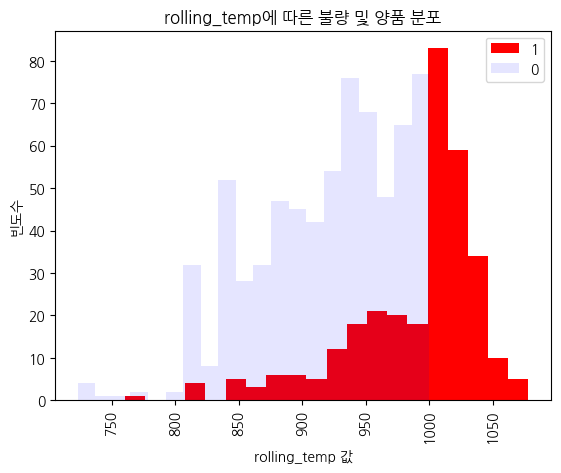

In [594]:
Y_data = df[df['scale'] == 0]['rolling_temp'] # 양품일때 rolling_temp
B_data = df[df['scale'] == 1]['rolling_temp'] # 불량일때 rolling_temp

plt.hist(B_data, bins=20, alpha=1, label='1', color='red')  # 불량에 대한 히스토그램
plt.hist(Y_data, bins=20, alpha=0.1, label='0', color='blue')
plt.title('rolling_temp에 따른 불량 및 양품 분포')
plt.xticks(rotation=90)
plt.xlabel('rolling_temp 값')
plt.ylabel('빈도수')
plt.legend(loc='upper right')

In [595]:
# 정규성검정
statistic, p = stats.shapiro(Y_data)
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.9516641497612, p-value = 3.5179026575474226e-14


유의확률 p값이 유의수준 0.05보다 작으므로 양품인 경우의 rolling_teep의 데이터는 정규성을 만족하지않는다는 것을 알 수있다.

In [619]:
t_result = stats.ttest_ind(Y_data, B_data)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-18.74
p:0.0


정규성을 만족하지않기때문에 만위트니 u 검정을 시행한다.

In [596]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(Y_data, B_data, alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 32322.0
p-value: 3.721122729563509e-69


유의확률 p값이 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다는 것을 알 수있다. 따라서 양품과 불량품 간에 rolling_temp에 차이가 있다고 할 수있다.
또한 t통계량값이 음수이므로 불량일 때의 rolling_temp의 평균이 더 크다는 것을 알 수있다.

**[가설검정 5]**

* 한 공장에 4개의 작업조에서 생산제품의 품질 수준이 같은지 가설을 세우고 검정해본다.

* H0: 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 없다.
* H1: 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 있다.

In [ ]:
# work_group를 기준으로 그룹화하고, scale 변수의 값들을 리스트로 모으기
grouped = df.groupby('work_group')['scale'].apply(list).reset_index()

# 'scale' 열의 값을 1조, 2조, 3조, 4조의 'key'에 맞게 설정
scale_mapping = {
    '1조': grouped[grouped['work_group'] == '1조']['scale'].values[0],
    '2조': grouped[grouped['work_group'] == '2조']['scale'].values[0],
    '3조': grouped[grouped['work_group'] == '3조']['scale'].values[0],
    '4조': grouped[grouped['work_group'] == '4조']['scale'].values[0]
}

# 'key'와 'value'를 가지는 데이터 프레임 생성
result_df = pd.DataFrame(list(scale_mapping.items()), columns=['work_group', 'scale'])

# 결과 출력
print(result_df)

In [ ]:
from scipy.stats import chi2_contingency

# df에서 'work_group'과 'scale' 열로 교차표 생성
cross_tab = pd.crosstab(df['work_group'], df['scale'])

#chi-square test 실행
chi, pval, dof, expected = chi2_contingency(cross_tab)

#결과 출력
print("chi-square test")
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree of freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

유의확률 p값이 유의수준 0.05보다 작기때문에 귀무가설을 기각한다. 따라서 유의수준 5%하에서 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 있다고 할 수있다.

**[가설검정 6]**

* 압연 방법 별 후판제품의 품질 수준이 같은지 검정해본다.(동일성검정)

* H0: TMCP,CR 두 압연 방법별 후판제품의 품질은 서로 같다. 
* H1: TMCP, CR 두 압연 방법별 후판제품의 품질은 서로 다르다.

In [ ]:
# rolling_method를 기준으로 그룹화하고, scale 변수의 값들을 리스트로 모으기
grouped = df.groupby('rolling_method')['scale'].apply(list).reset_index()

# 'scale' 열의 값을 1조, 2조, 3조, 4조의 'key'에 맞게 설정
scale_mapping = {
    'TMCP(온도제어)': grouped[grouped['rolling_method'] == 'TMCP(온도제어)']['scale'].values[0],
    'CR(제어압연)': grouped[grouped['rolling_method'] == 'CR(제어압연)']['scale'].values[0],
}

# 'key'와 'value'를 가지는 데이터 프레임 생성
result_df = pd.DataFrame(list(scale_mapping.items()), columns=['rolling_method', 'scale'])

# 결과 출력
print(result_df)

In [ ]:
# df에서 'rolling_method'과 'scale' 열로 교차표 생성
cross_tab = pd.crosstab(df['rolling_method'], df['scale'])

#chi-square test 실행
chi, pval, dof, expected = chi2_contingency(cross_tab)

#결과 출력
print("chi-square test")
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree of freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

유의확률 p값이 유의수준 0.05보다 작기때문에 귀무가설을 기각한다. 따라서 유의수준 5%하에서 공장에서 생산되는 후판제품은 압연 방법별(CR, TMCP)로 scale 불량에 차이가 있다고 할 수 있다.

**[가설검정 7]**

* 압연 방법 별 후판제품의 품질 수준이 같은지 검정해본다.(동일성검정)

* H0: TMCP,CR 두 압연 방법별 후판제품의 품질은 서로 같다. 
* H1: TMCP, CR 두 압연 방법별 후판제품의 품질은 서로 다르다.

### 회귀분석(예측)

## 4. 모델링

## 5. 결론

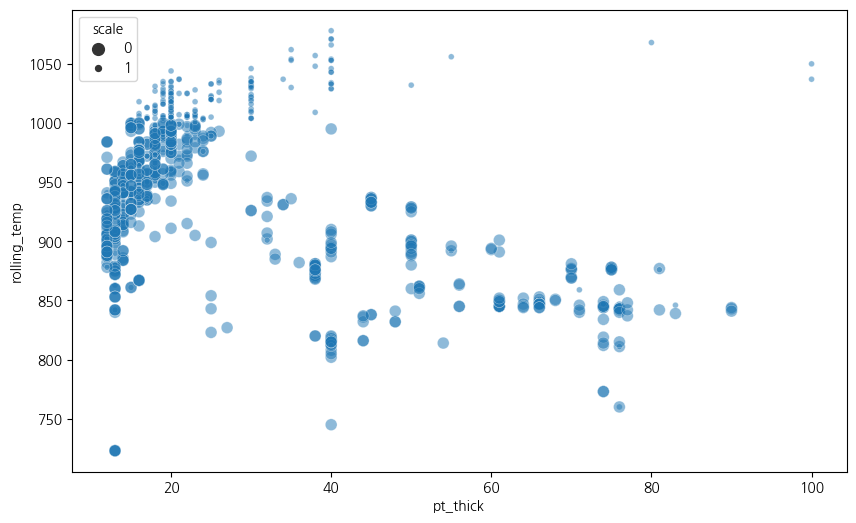

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pt_thick', y='rolling_temp', size='scale', alpha=0.5)
plt.show()

# 두께가 두꺼울수록 열 전달에 시간이 많이 걸릴 것이라 생각
# 압연온도가 높을수록 열 전달 시간이 줄어들까? 
# 두께와 온도의 관계 보기위한 그래프 그려보기

<Axes: ylabel='scale'>

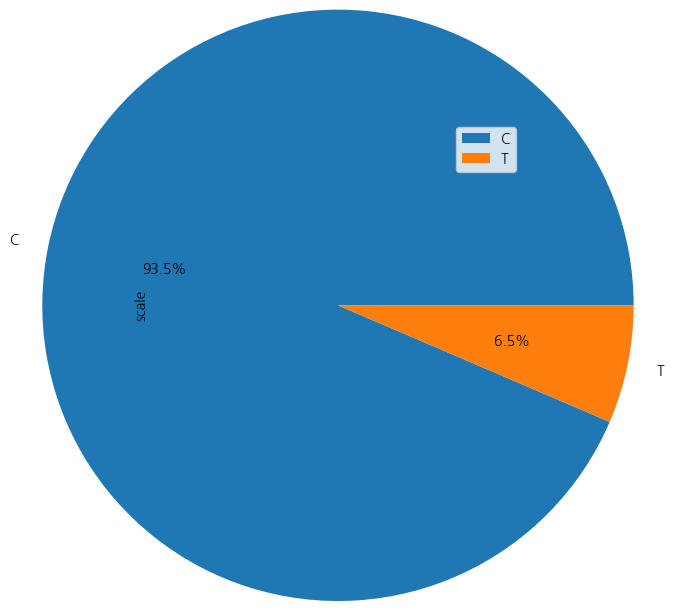

In [157]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("steel_kind", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["steel_kind"], autopct= "%.1f%%", radius = 2)

불량의 93.5%는 탄소강일 때 발생한다. 티타늄강보다 탄소강의 갯수가 많아서 불량률이 더 높은 것 같다

In [159]:
df[df["rolling_method"]=="CR(제어압연)"]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
10,10,03JAN2023:08:54:07,0,COMMON,공통,T,38,3100,16200,적용,...,1135,119,1124,73,261,1124,CR(제어압연),881,8,1조
12,12,03JAN2023:09:17:03,0,COMMON,공통,T,38,3100,16200,적용,...,1127,134,1123,58,259,1123,CR(제어압연),869,8,1조
14,14,03JAN2023:09:33:17,0,COMMON,공통,T,38,3100,16200,적용,...,1132,125,1127,62,286,1127,CR(제어압연),820,8,1조
15,15,03JAN2023:09:42:31,1,COMMON,공통,T,38,3100,16200,적용,...,1131,120,1125,68,259,1125,CR(제어압연),1057,8,1조
17,17,03JAN2023:10:00:51,0,COMMON,공통,T,30,1900,34800,적용,...,1119,130,1120,65,282,1120,CR(제어압연),926,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


<Axes: ylabel='scale'>

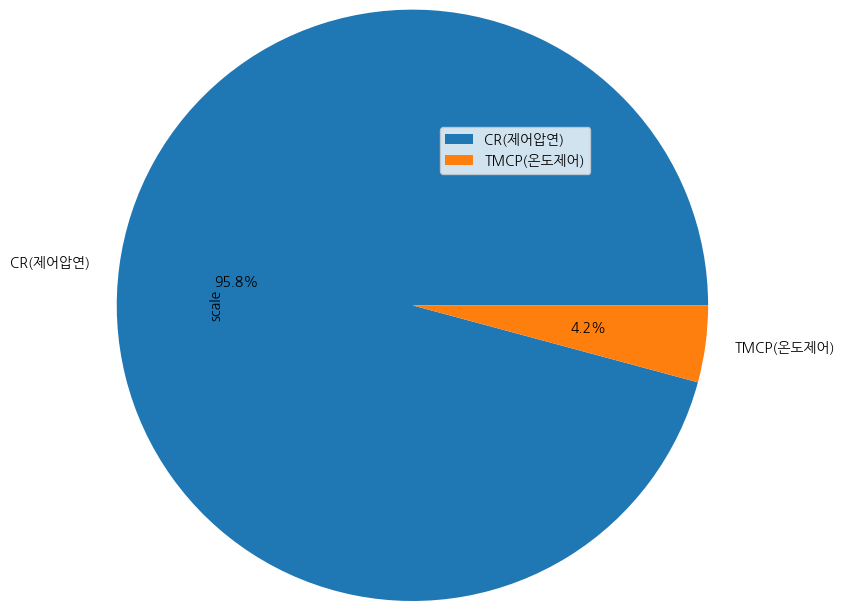

In [139]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("rolling_method", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["rolling_method"], autopct= "%.1f%%", radius = 2)

In [108]:
len(df.groupby(["spec_long"]))

66

In [119]:
df_groups = df.groupby(["spec_long"])["scale"]
df_w = pd.DataFrame(columns = ["spec_long", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"spec_long" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,spec_long,scale_prob
0,A131-DH36TM,1.000000
1,A283-C,0.833333
2,A516-60,0.666667
3,A709-36,0.000000
4,AB/A,0.254902
...,...,...
61,NV-E32-TM,0.000000
62,NV-E36-TM,0.000000
63,PILAC-BT33,0.052632
64,SA283-C,0.476190


In [140]:
df['spec_long'].value_counts()

JS-SM490YB     82
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64

spec_long : 군집화해서 양품/불량 비교 해보기

In [ ]:
# 스펙 군집화
df_spec_cluster = df.groupby(["spec_long"]).mean()
df_spec_cluster

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_spec_cluster)
df_scaled[:5]